In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mplt
import matplotlib as plt
import datetime as dati

In [2]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier

In [4]:
train_csv = pd.read_csv("./data/friofrio/Train_TP2_Datos_2020-2C.csv",
        parse_dates = ['Account_Created_Date', 'Opportunity_Created_Date',
                       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date',
                       'Quote_Expiry_Date', 'Last_Modified_Date','Last_Activity' ])
# Limpio registros con muchos datos faltantes o inutiles
train_csv = train_csv.drop(columns= ['Prod_Category_A', 'Quote_Type',
                                 'Product_Category_B', 'Delivery_Terms',
                                 'Actual_Delivery_Date', 'Submitted_for_Approval',
                                 'Last_Activity','Price', 'Currency','Brand', 
                                 'Opportunity_Type', 'Size','Product_Type',
                                 'Account_Type', 'ASP_Currency', 'ASP_(converted)_Currency',
                                 'Total_Amount_Currency', 'Account_Name',
                                 'Opportunity_Name','Total_Taxable_Amount_Currency',
                                 'Product_Family', 'Product_Name'])

In [5]:
train_csv = train_csv.loc[(train_csv['Stage'] == 'Closed Won') | (train_csv['Stage'] == 'Closed Lost')]
train_csv['Oportunidad ganada'] = (train_csv['Stage'] == 'Closed Won').astype(int)

In [6]:
train_csv_numerics = train_csv.select_dtypes(include = np.number).fillna(0)

In [7]:
X = train_csv_numerics.drop(columns = 'Oportunidad ganada').fillna(0)

y = train_csv_numerics[['Oportunidad ganada']].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [8]:
xgbr = xgb.XGBRegressor(
    colsample_bytree = 0.9,
    learning_rate = 0.1,
    max_depth = 8,
    alpha = 0.5,
    n_estimators = 28)

xgbr.fit(X_train, y_train)

preds = xgbr.predict(X_test)

log_loss(y_test, preds, eps=1e-15, normalize=True, sample_weight=None, labels=None)

/home/lucas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/home/lucas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


nan

In [9]:
train_csv_lucas = pd.read_csv('Features_Train_Lucas.csv')

In [10]:
train_csv_lucas = train_csv_lucas.select_dtypes(include = np.number).fillna(0)
train_csv_lucas.dtypes

Unnamed: 0                         int64
ID                                 int64
Region_ganados                     int64
Region_count                       int64
Region_mean                      float64
                                  ...   
Total_Amount_converted_mean      float64
Total_Amount_converted_median    float64
Total_Amount_converted_std       float64
Total_Amount_converted_max       float64
Total_Amount_converted_min       float64
Length: 80, dtype: object

In [11]:
train_csv_numerics = train_csv_numerics.replace([np.inf, -np.inf], np.nan)
train_csv_numerics = train_csv_numerics.join(train_csv_lucas, on = 'ID', lsuffix = 'ID', rsuffix = 'ID').fillna(0)
train_csv_numerics = train_csv_numerics.astype('float64')

train_csv_numerics = train_csv_numerics.replace([np.inf, -np.inf], np.nan)
np.isinf(train_csv_numerics).values.sum()

0

In [12]:
X = train_csv_numerics.drop(columns = 'Oportunidad ganada').fillna(0)

y = train_csv_numerics[['Oportunidad ganada']].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [13]:
X_train.head()

,IDID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Opportunity_ID,ASP,ASP_(converted),Delivery_Year,TRF,...,Total_Taxable_Amount_median,Total_Taxable_Amount_std,Total_Taxable_Amount_max,Total_Taxable_Amount_min,Total_Amount_converted_sum,Total_Amount_converted_mean,Total_Amount_converted_median,Total_Amount_converted_std,Total_Amount_converted_max,Total_Amount_converted_min
9799,22022.0,1.0,1.0,0.0,0.0,6206.0,0.390,0.390,2017.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10710,26482.0,1.0,1.0,0.0,0.0,6637.0,0.000,0.000,2017.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5593,27979.0,1.0,0.0,1.0,0.0,3418.0,0.365,0.365,2017.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16368,26159.0,1.0,0.0,1.0,0.0,12531.0,0.000,0.000,2016.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4725,24447.0,1.0,1.0,0.0,0.0,2787.0,0.000,0.000,2016.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X_train = X_train.loc[:,~X_train.columns.duplicated()]
X_test = X_test.loc[:,~X_test.columns.duplicated()]

In [47]:
xgbr = xgb.XGBRegressor(
    objective ='binary:logistic',
    eval_metric = 'logloss',
    colsample_bytree = 0.5,
    learning_rate = 0.09,
    max_depth = 20,
    alpha = 0.1,
    n_estimators = 75)

xgbr.fit(X_train, y_train)

preds = xgbr.predict(X_test)

log_loss(y_test, preds, eps=1e-15, normalize=True, sample_weight=None, labels=None)

0.29674733871298153

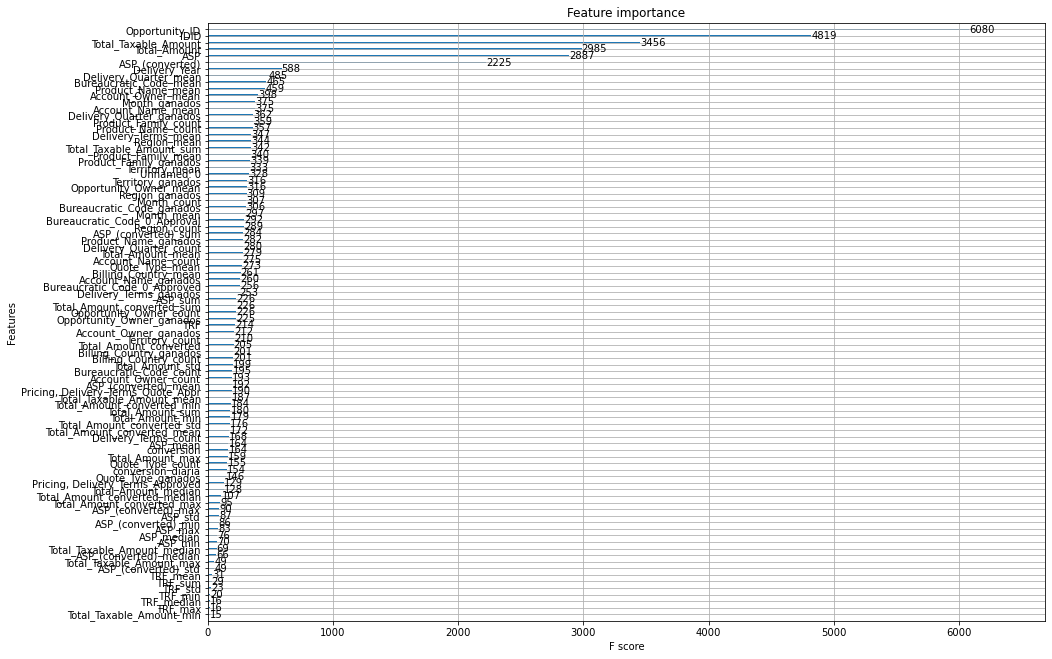

In [61]:
fig, ax = mplt.subplots(1,1,figsize=(15, 11))
xgb.plot_importance(xgbr,ax = ax)

mplt.show()

In [35]:
preds

array([0.79306245, 0.04036835, 0.99661344, ..., 0.01503944, 0.11027694,
       0.9871264 ], dtype=float32)

In [17]:
np.argpartition(preds,4)[-4:]

array([9, 4, 2, 0])

In [18]:
test_csv = pd.read_csv("./data/friofrio/Test_TP2_Datos_2020-2C.csv",
        parse_dates = ['Account_Created_Date', 'Opportunity_Created_Date',
                       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date',
                       'Quote_Expiry_Date', 'Last_Modified_Date','Last_Activity' ])
# Limpio registros con muchos datos faltantes o inutiles
test_csv = test_csv.drop(columns= ['Prod_Category_A', 'Quote_Type',
                                 'Product_Category_B', 'Delivery_Terms',
                                 'Actual_Delivery_Date', 'Submitted_for_Approval',
                                 'Last_Activity','Price', 'Currency','Brand', 
                                 'Opportunity_Type', 'Size','Product_Type',
                                 'Account_Type', 'ASP_Currency', 'ASP_(converted)_Currency',
                                 'Total_Amount_Currency', 'Account_Name',
                                 'Opportunity_Name','Total_Taxable_Amount_Currency',
                                 'Product_Family', 'Product_Name'])

In [19]:
test = test_csv.select_dtypes(include = np.number).fillna(0)
np.isinf(test).values.sum()

test = test.replace([np.inf, -np.inf], np.nan)
test = test.join(train_csv_lucas, on = 'ID', lsuffix = 'ID', rsuffix = 'ID').fillna(0)
test = test.astype('float64')

test = test.replace([np.inf, -np.inf], np.nan)
np.isinf(test).values.sum()

X_test_to_submit = test.select_dtypes(include = np.number).fillna(0)

X_test_to_submit = X_test_to_submit.loc[:,~X_test_to_submit.columns.duplicated()]

In [20]:
preds_to_submit = (xgbr.predict(X_test_to_submit))

In [21]:
test_csv['Target'] = preds_to_submit

In [22]:
result = test_csv[['Opportunity_ID','Target']].groupby(['Opportunity_ID']).mean()
result.reset_index(inplace=True)

In [23]:
result['Opportunity_ID'] = result['Opportunity_ID'].astype(int)
result.dtypes

Opportunity_ID      int64
Target            float32
dtype: object

In [24]:
result.to_csv('predicciones.csv', index = False)

In [25]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

ValueError: feature_names must be unique